In [19]:
from IPython.core.display import display, HTML

import numpy as np
means = np.load("data/means.npy").astype(np.float32)
covs = np.load("data/covs.npy").astype(np.float32)
xicovs = np.load("data/xicovs.npy").astype(np.float32)
signals = np.load("data/signals.npy").astype(np.float32)
A = np.load("data/A.npy").astype(np.float32)
dt = np.load("data/dt.npy")[0]
C = np.load("data/C.npy").astype(np.float32)
D = np.load("data/D.npy").astype(np.float32)

coeffs = [C, A, D , dt]

In [20]:

from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
from RNN import *
import tensorflow as tf
%load_ext autoreload
%autoreload 2

tfsignals = tf.convert_to_tensor(signals)
tfxicovs = tf.convert_to_tensor(xicovs)[:-1]

#toysignals = tfsignals[:10][tf.newaxis,:,:]
#toyxicovs = tfxicovs[:10][tf.newaxis,:,:,:]
#inputs = (toyxicovs, toysignals)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


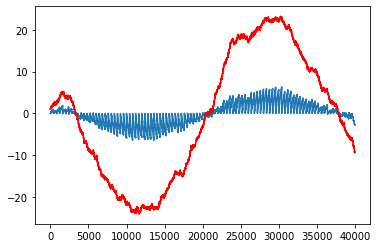

In [21]:
model = RecModel(coeffs)

batched_signals = tf.stack(tf.split(tfsignals, 100)) 
batched_xicovs  = tf.stack(tf.split(tfxicovs, 100))

inputs = (batched_xicovs, batched_signals)

preds = model(inputs )

plt.plot(tf.reshape(preds, [-1,2])[:,0])
plt.plot(means[:,0], color="red")

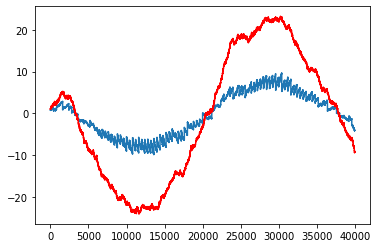

In [22]:
model = RecModel(coeffs)

batched_signals = tf.stack(tf.split(tfsignals, 100)) 
batched_xicovs  = tf.stack(tf.split(tfxicovs, 100))

inputs = (batched_xicovs, batched_signals)

preds = model(inputs )

plt.plot(tf.reshape(preds, [-1,2])[:,0])
plt.plot(means[:,0], color="red")

In [23]:
tfsignals[:20]

<tf.Tensor: shape=(40000, 2), dtype=float32, numpy=
array([[-0.01571522, -0.00512357],
       [ 0.01813254, -0.02771763],
       [ 0.0548196 ,  0.02468396],
       ...,
       [ 0.04221111,  0.0035826 ],
       [ 0.04017262, -0.01458438],
       [-0.04898356, -0.01565416]], dtype=float32)>